<a href="https://colab.research.google.com/github/RGS06/BCSL606/blob/main/LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

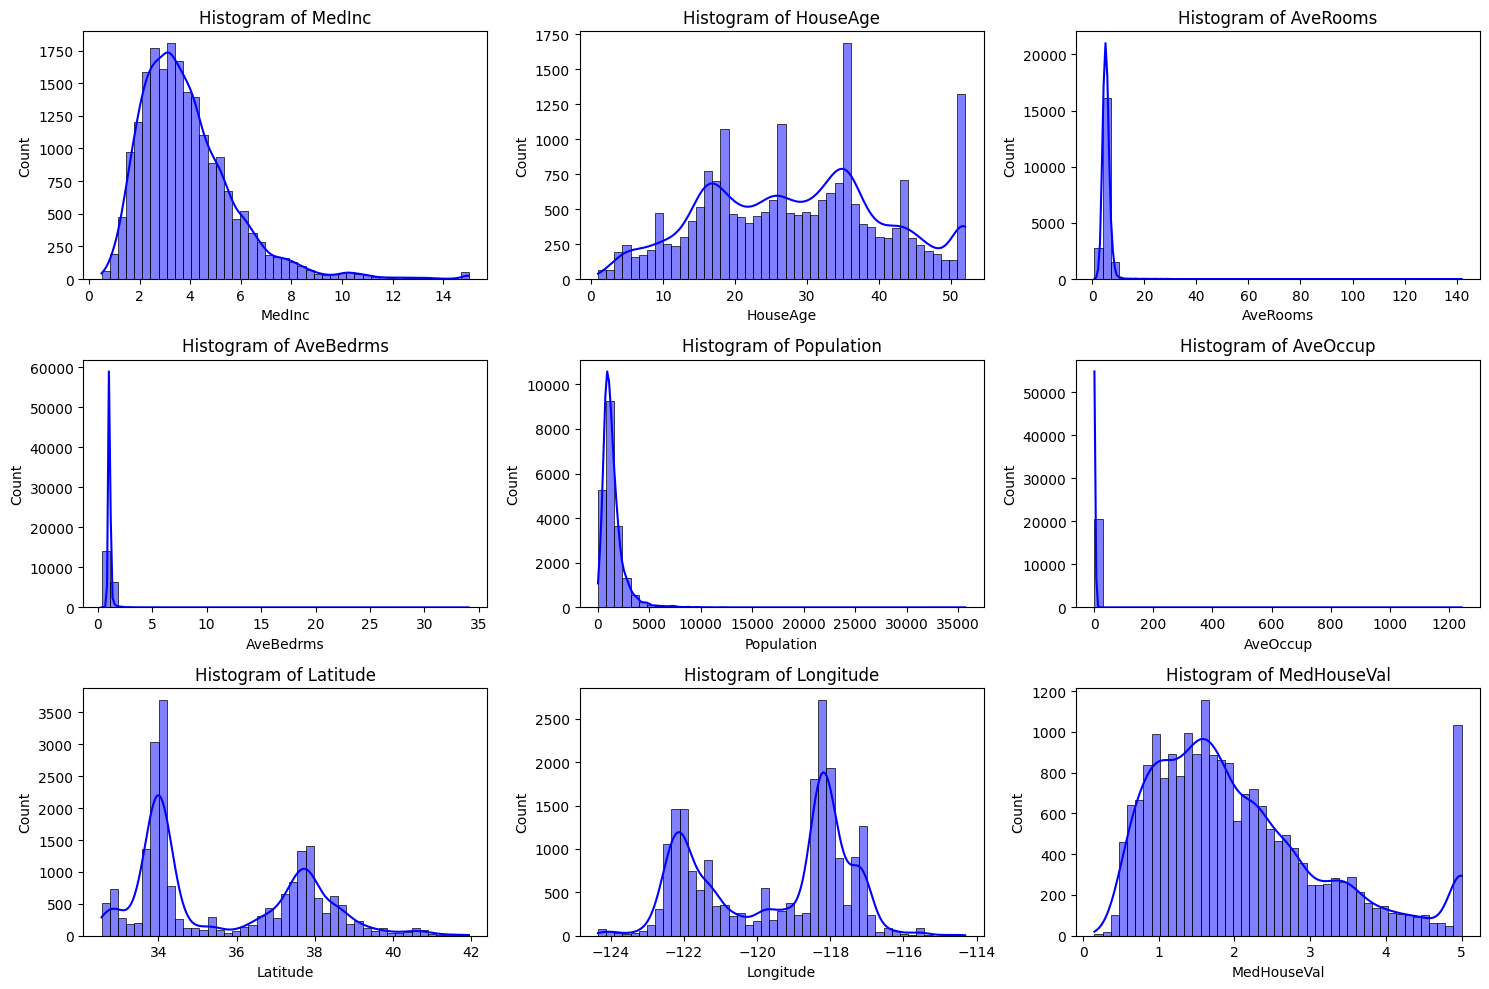

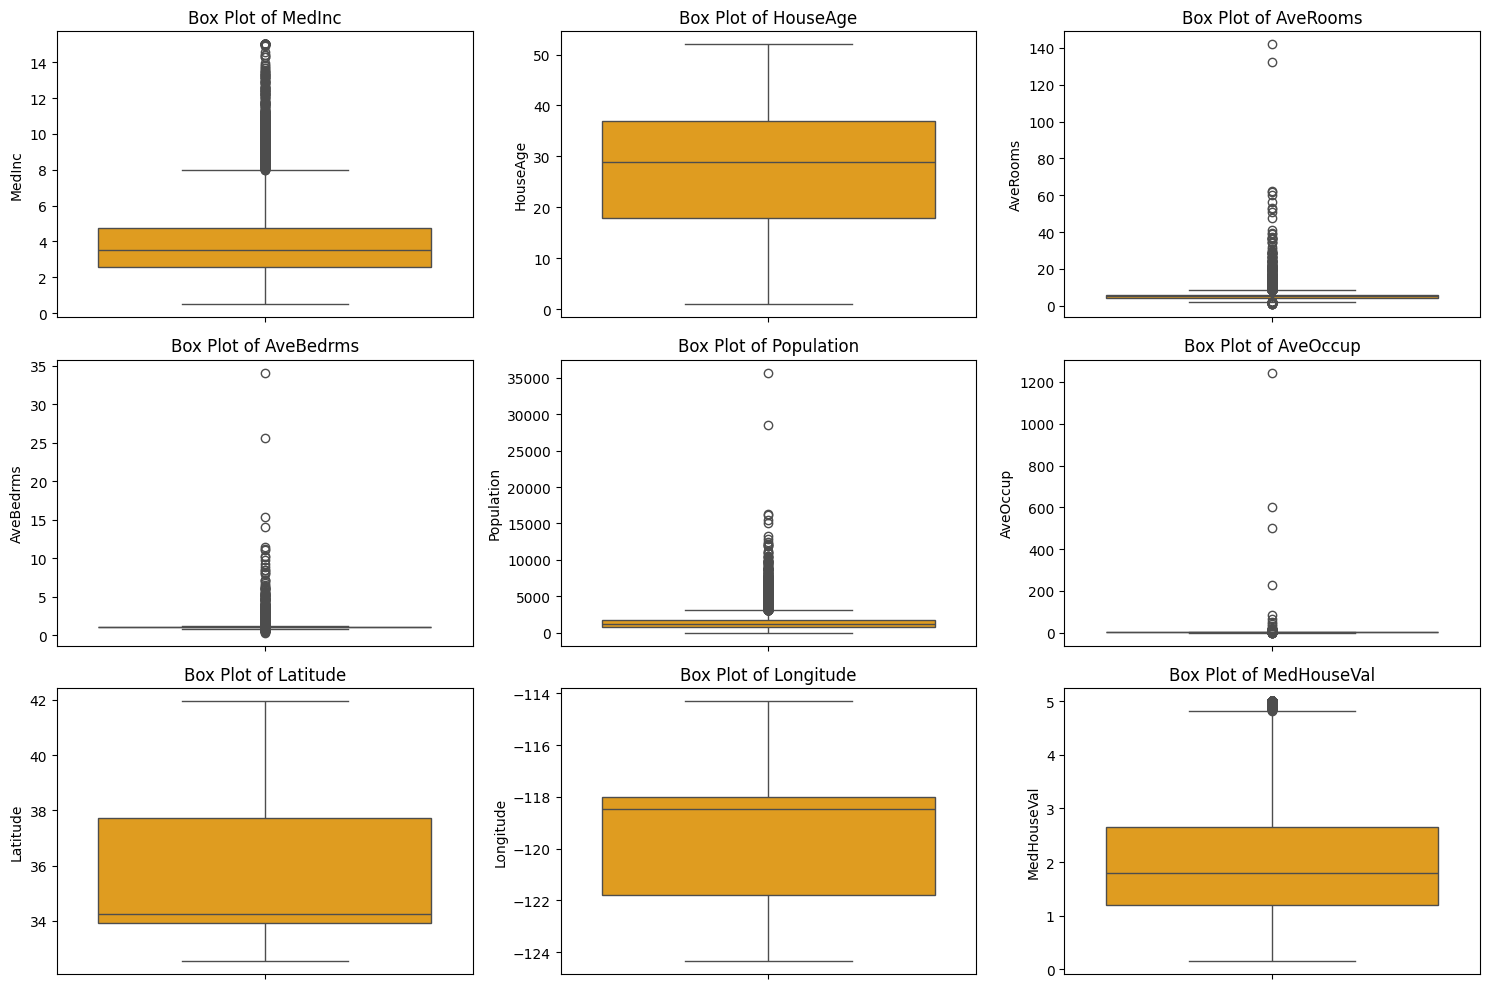

Description of Outliers
{'MedInc': 681, 'HouseAge': 0, 'AveRooms': 511, 'AveBedrms': 1424, 'Population': 1196, 'AveOccup': 711, 'Latitude': 0, 'Longitude': 0, 'MedHouseVal': 1071}
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing# Step 1: Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
housing_df=data.frame
numerical_features=housing_df.select_dtypes(include=[np.number])
numerical_features.head()
#plot_histogram
plt.figure(figsize=(15,10))
for i ,feature in enumerate(numerical_features.columns):
  plt.subplot(3,3,i+1)
  sns.histplot(data=housing_df[feature],kde=True,bins=45,color='blue')
  plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

#plot_boxplot
plt.figure(figsize=(15,10))
for i ,feature in enumerate(numerical_features.columns):
  plt.subplot(3,3,i+1)
  sns.boxplot(data=housing_df[feature],color='orange')
  plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

#identify_outliers
print("Description of Outliers")
outliers_summary={}
for feature in numerical_features.columns:
  Q1=housing_df[feature].quantile(0.25)
  Q3=housing_df[feature].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=housing_df[(housing_df[feature]<lower_bound) | (housing_df[feature]>upper_bound)]
  outliers_summary[feature]=len(outliers)
print(outliers_summary)
print(housing_df.describe())

In [ ]:
import numpy as np
from collections import Counter

# Generate 100 random values in the range [0,1]
np.random.seed(42)
x = np.random.rand(100)

# Assign class labels to first 50 points
labels = np.where(x[:50] <= 0.5, 'Class1', 'Class2')

# Function to classify test points using KNN
def knn_classify(k, train_x, train_labels, test_x):
    predictions = []
    for test_point in test_x:
        # Compute distances and get k nearest neighbors
        neighbors = np.argsort(np.abs(train_x - test_point))[:k]
        # Get majority class
        most_common = Counter(train_labels[neighbors]).most_common(1)[0][0]
        predictions.append(most_common)
    return predictions

# Values of k to test
k_values = [1, 2, 3, 4, 5, 20, 30]
test_x = x[50:]

# Classify and print results for each k
for k in k_values:
    predictions = knn_classify(k, x[:50], labels, test_x)
    print(f"K={k}: {predictions}")

K=1: ['Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class2', 'Class1', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class2', 'Class1', 'Class2', 'Class1', 'Class1', 'Class1']
K=2: ['Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class2', 'Class1', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class2', 'Class1', 'Class2', 'Class1', 'Class1'

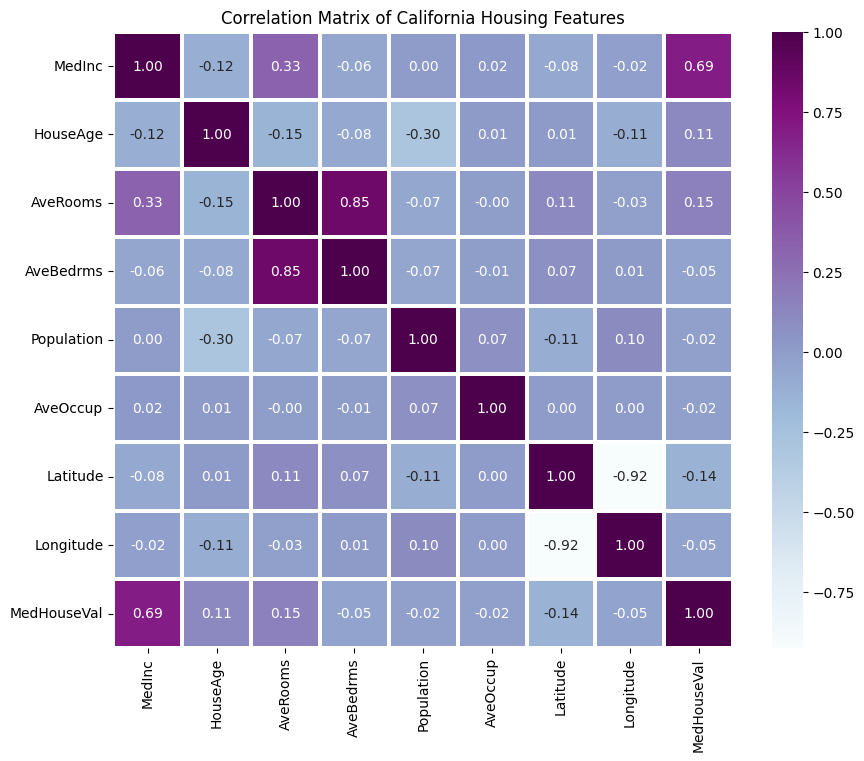

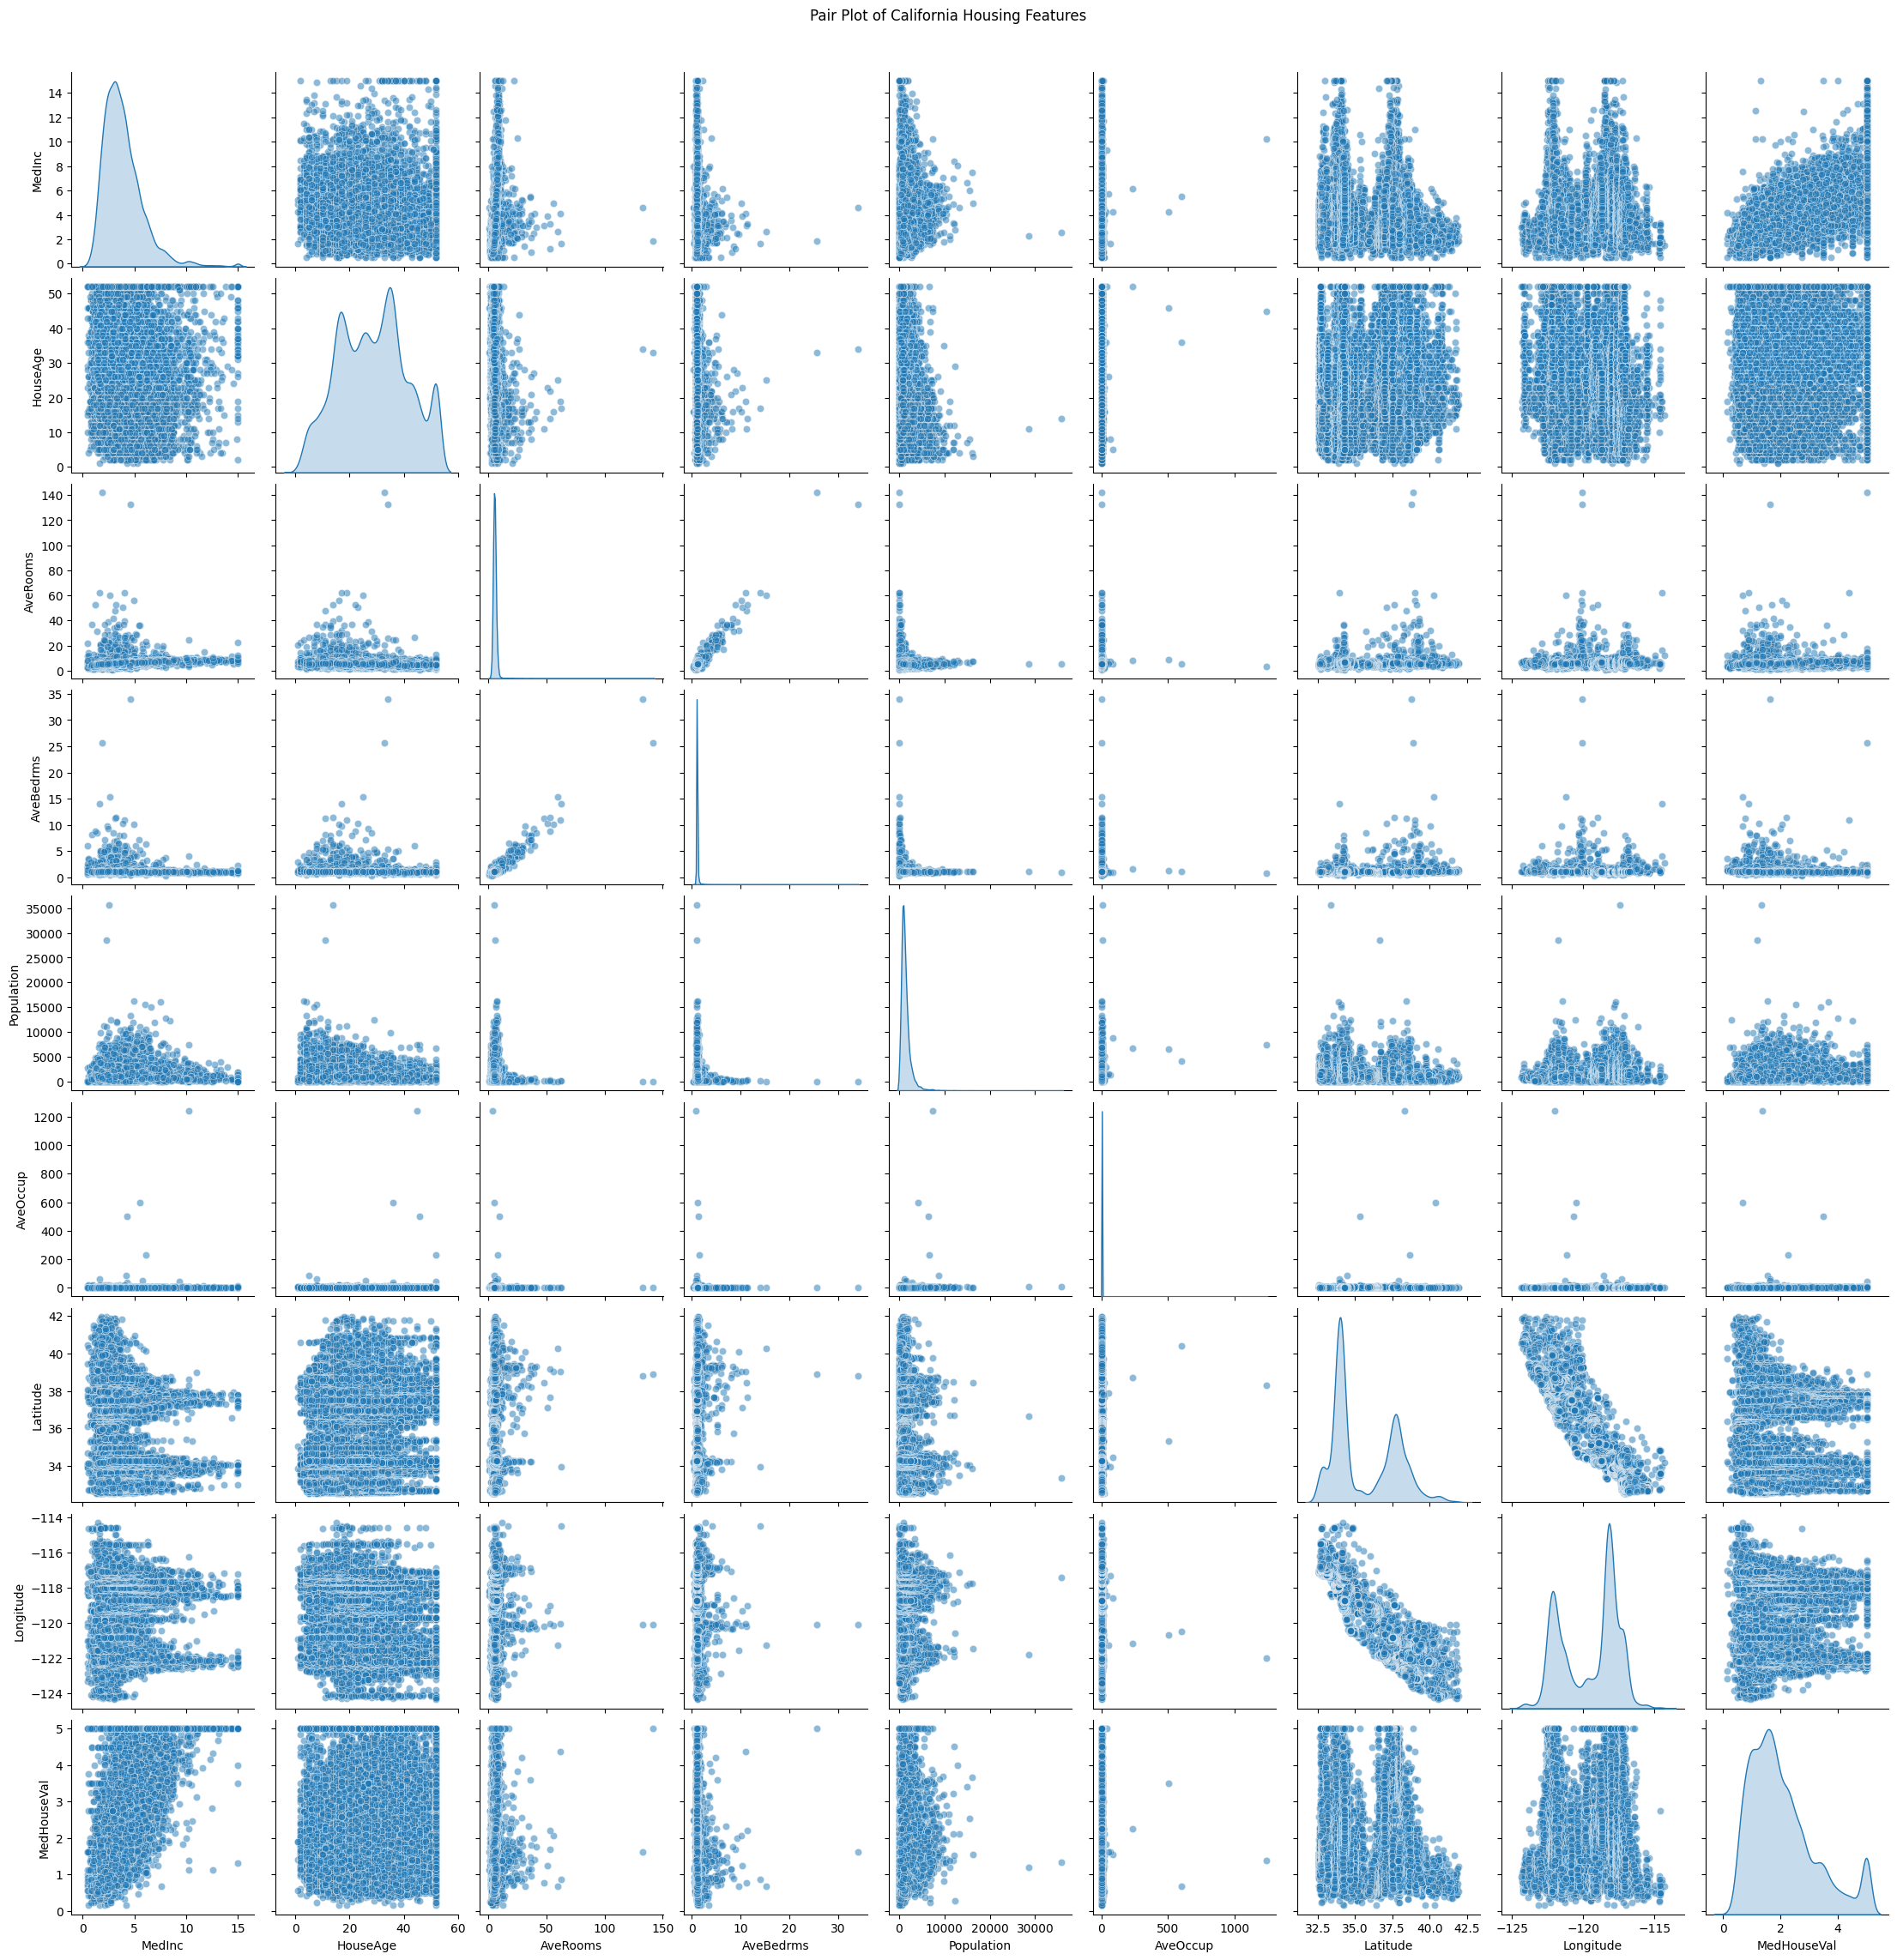

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
california_data = fetch_california_housing(as_frame=True)
data = california_data.frame
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f', linewidths=1.5)
plt.title('Correlation Matrix of California Housing Features')
plt.show()
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of California Housing Features', y=1.02)
plt.show()

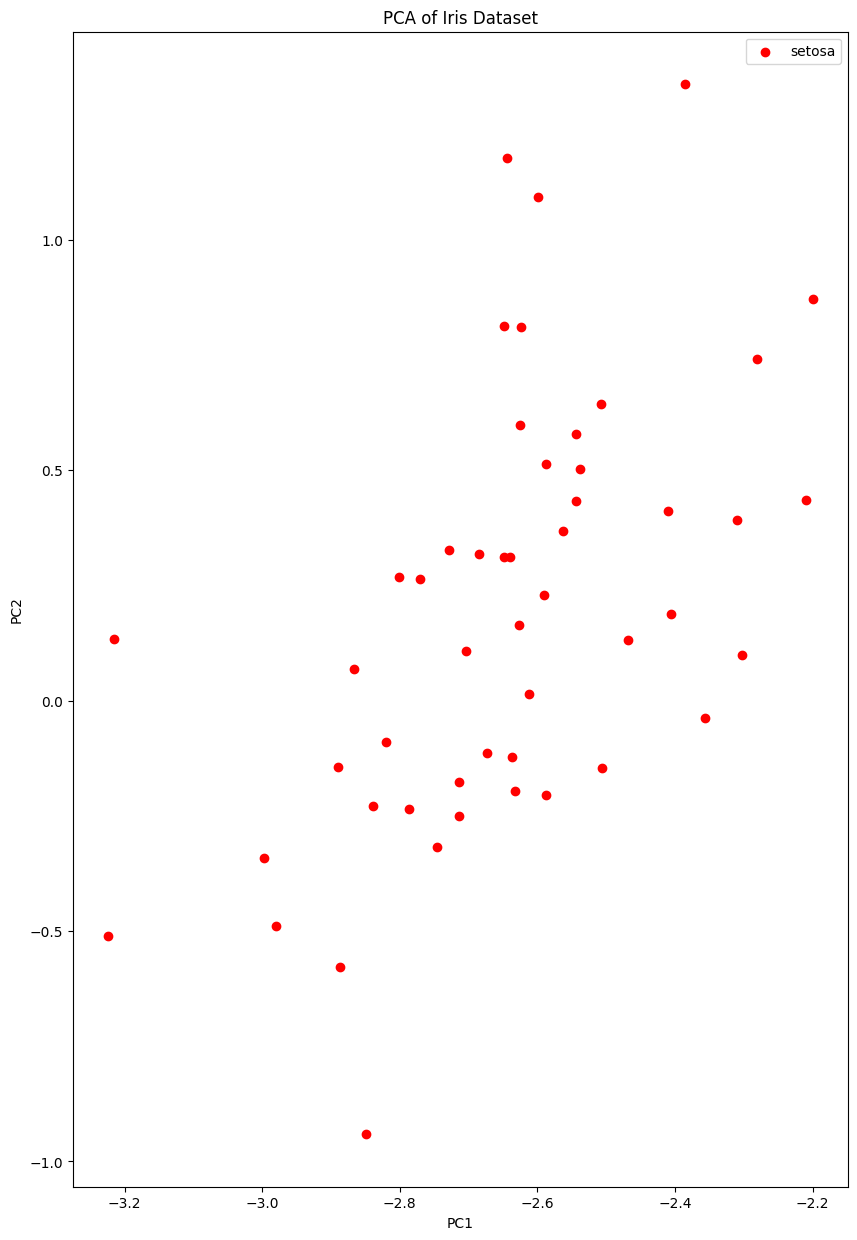

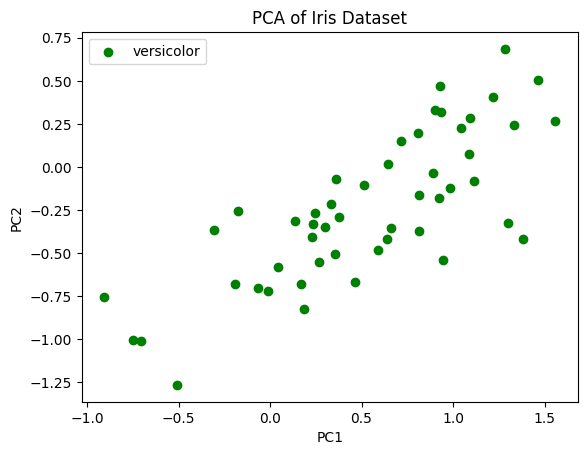

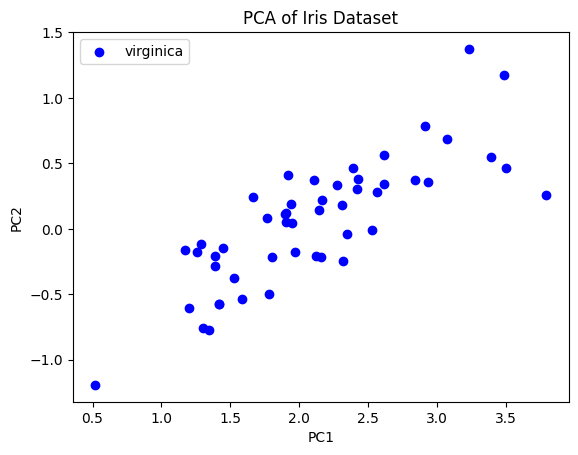

In [ ]:
# Develop a program to implement Principal Component Analysis (PCA) for reducing the dimensionality of the Iris dataset from 4 features to 2.
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris = load_iris()
data = iris.data
target = iris.target
label_names=iris.target_names


iris_df=pd.DataFrame(data,columns=iris.feature_names)

pca=PCA(n_components=2)
data_reduced=pca.fit_transform(data)

reduced_df=pd.DataFrame(data_reduced,columns=['PC1','PC2'])
reduced_df['target']=target

plt.figure(figsize=(10,15))
colors=['r','g','b']
for i ,target in enumerate(np.unique(target)):
  plt.scatter(reduced_df[reduced_df['target']==target]['PC1'],reduced_df[reduced_df['target']==target]['PC2'],c=colors[i],label=label_names[i])
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.title('PCA of Iris Dataset')
  plt.legend()
  plt.show()




In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/enjoysport.csv')

attribute = np.array(data)[:,:-1]
target = np.array(data)[:,-1]
print("Training data:\n")
print(data)
def train(att,tar):
  for i,val in enumerate(tar):
    if val=='yes':
      specific_h=att[i].copy()
      break
  for i,val in enumerate(att):
    if tar[i]=='yes':
      for x in range(len(specific_h)):
        if val[x]!=specific_h[x]:
          specific_h[x]='?'
        else:
          pass
  return specific_h
print("\n")
print(train(attribute,target))


Training data:

     sky air_temp humidity    wind water forecast enjoy_sport
0  sunny     warm   normal  strong  warm     same         yes
1  sunny     warm     high  strong  warm     same         yes
2  rainy     cold     high  strong  warm   change          no
3  sunny     warm     high  strong  cool   change         yes


['sunny' 'warm' '?' 'strong' '?' '?']


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Generate 100 random values in range [0,1]
data = np.random.rand(100).reshape(-1, 1)

# Label first 50 points based on the given condition
labels = np.array(["Class1" if x <= 0.5 else "Class2" for x in data[:50]])

# Split data into training (first 50) and testing (remaining 50)
train_data, train_labels = data[:50], labels
test_data = data[50:]

# Apply k-NN for given k values
k_values = [1, 2, 3, 4, 5, 20, 30]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_labels)
    predictions = knn.predict(test_data)

    print(f"Results for k={k}:")
    print(predictions, "\n")


Results for k=1:
['Class2' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2'
 'Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class2' 'Class2'
 'Class2' 'Class2' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2'
 'Class1' 'Class2' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2'
 'Class2' 'Class1' 'Class2' 'Class1' 'Class1' 'Class2' 'Class1' 'Class2'
 'Class2' 'Class1' 'Class2' 'Class1' 'Class2' 'Class2' 'Class1' 'Class1'
 'Class1' 'Class2'] 

Results for k=2:
['Class2' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2'
 'Class2' 'Class2' 'Class1' 'Class2' 'Class2' 'Class1' 'Class2' 'Class2'
 'Class2' 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2'
 'Class1' 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2'
 'Class2' 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class1' 'Class2'
 'Class2' 'Class1' 'Class2' 'Class1' 'Class2' 'Class2' 'Class1' 'Class1'
 'Class1' 'Class2'] 

Results for k=3:
['Class2' 'Class1' 'Class1' '

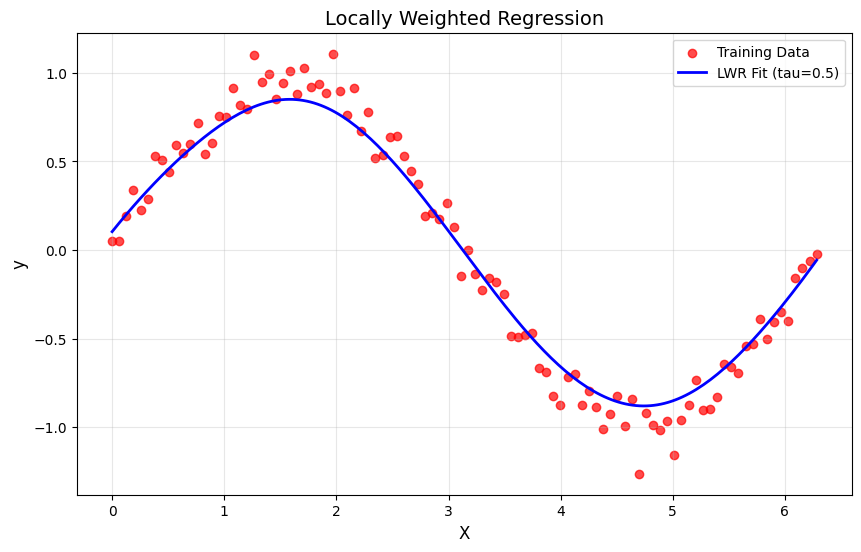

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def gaussian_kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))

def locally_weighted_regression(x, X, y, tau):
    m = X.shape[0]
    weights = np.array([gaussian_kernel(x, X[i], tau) for i in range(m)])
    W = np.diag(weights)
    X_transpose_W = X.T @ W
    theta = np.linalg.inv(X_transpose_W @ X) @ X_transpose_W @ y
    return x @ theta

np.random.seed(42)
X = np.linspace(0, 2 * np.pi, 100)
y = np.sin(X) + 0.1 * np.random.randn(100)
X_bias = np.c_[np.ones(X.shape), X]

x_test = np.linspace(0, 2 * np.pi, 200)
x_test_bias = np.c_[np.ones(x_test.shape), x_test]
tau = 0.5
y_pred = np.array([locally_weighted_regression(xi, X_bias, y, tau) for xi in x_test_bias])

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Training Data', alpha=0.7)
plt.plot(x_test, y_pred, color='blue', label=f'LWR Fit (tau={tau})', linewidth=2)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Locally Weighted Regression', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


Demonstrating Linear Regression and Polynomial Regression



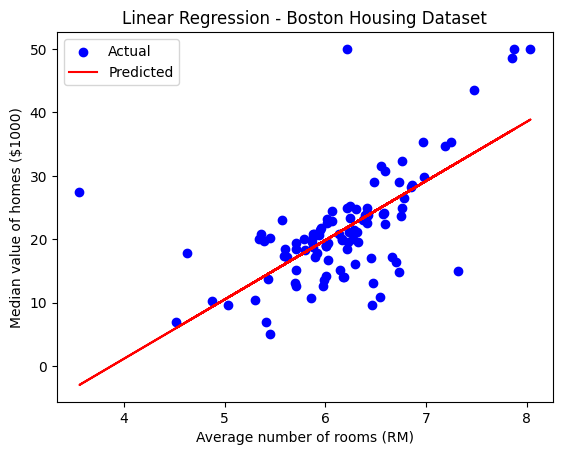

Linear Regression - Boston Housing Dataset
Mean Squared Error: 46.144775347317264
R^2 Score: 0.3707569232254778


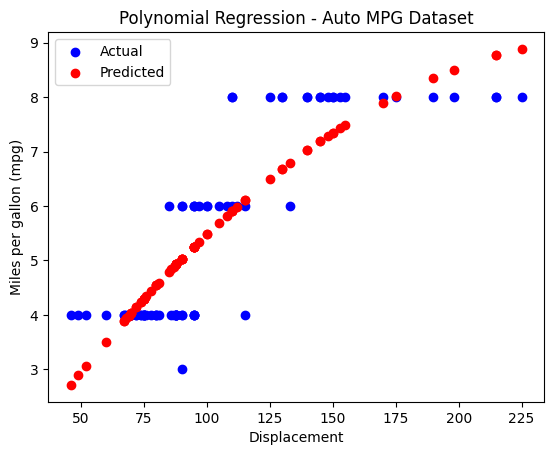

Polynomial Regression - Auto MPG Dataset
Mean Squared Error: 0.7431490557205861
R^2 Score: 0.7505650609469626


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression_boston():
    url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
    df = pd.read_csv(url)

    X = df[["rm"]].values  # Selecting 'rm' (average number of rooms per dwelling)
    y = df["medv"].values  # 'medv' is the median house price

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.plot(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Average number of rooms (RM)")
    plt.ylabel("Median value of homes ($1000)")
    plt.title("Linear Regression - Boston Housing Dataset")
    plt.legend()
    plt.show()

    print("Linear Regression - Boston Housing Dataset")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))

def polynomial_regression_auto_mpg():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
    column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]

    data = pd.read_csv(url, sep='\s+', names=column_names, na_values="?")
    data = data.dropna()

    X = data["displacement"].values.reshape(-1, 1)
    y = data["mpg"].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
    poly_model.fit(X_train, y_train)
    y_pred = poly_model.predict(X_test)

    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.scatter(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Displacement")
    plt.ylabel("Miles per gallon (mpg)")
    plt.title("Polynomial Regression - Auto MPG Dataset")
    plt.legend()
    plt.show()

    print("Polynomial Regression - Auto MPG Dataset")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))

if __name__ == "__main__":
    print("Demonstrating Linear Regression and Polynomial Regression\n")
    linear_regression_boston()
    polynomial_regression_auto_mpg()

Breast Cancer model trained successfully.


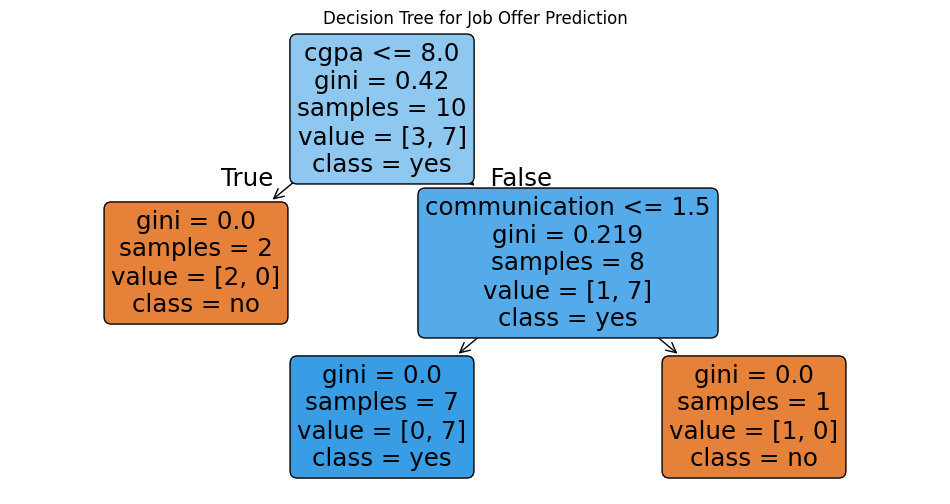

Predicted Job Offer for test sample: no


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Step 1: Load and train on Breast Cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

# Set random_state for reproducibility
bc_model = DecisionTreeClassifier(max_depth=4, random_state=42)
bc_model.fit(X_cancer, y_cancer)
print("Breast Cancer model trained successfully.")

# Step 2: Custom sample dataset (for job offer prediction)
sample_data = pd.DataFrame({
    'cgpa': [9.2, 8.5, 9.0, 7.5, 8.2, 9.1, 7.8, 9.3, 8.4, 8.6],
    'interactiveness': ['yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes'],
    'practical_knowledge': ['verygood', 'good', 'average', 'average', 'good', 'good', 'good', 'verygood', 'good', 'average'],
    'communication': ['good', 'moderate', 'poor', 'good', 'moderate', 'moderate', 'poor', 'good', 'good', 'good'],
    'job_offer': ['yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes']
})

# Encode categorical features
label_encoders = {}
for column in ['interactiveness', 'practical_knowledge', 'communication', 'job_offer']:
    le = LabelEncoder()
    sample_data[column] = le.fit_transform(sample_data[column])
    label_encoders[column] = le

X_sample = sample_data.drop('job_offer', axis=1)
y_sample = sample_data['job_offer']

# Step 3: Train a Decision Tree on the sample data
sample_model = DecisionTreeClassifier(max_depth=4, random_state=42)
sample_model.fit(X_sample, y_sample)

# Step 4: Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(sample_model, feature_names=X_sample.columns,
          class_names=label_encoders['job_offer'].classes_,
          filled=True, rounded=True)
plt.title("Decision Tree for Job Offer Prediction")
plt.show()

# Step 5: Test the model with a new sample input
test_sample = pd.DataFrame([{
    'cgpa': 6.5,
    'interactiveness': 'yes',
    'practical_knowledge': 'good',
    'communication': 'good'
}])

# Encode the test input using the same label encoders
for column in ['interactiveness', 'practical_knowledge', 'communication']:
    test_sample[column] = label_encoders[column].transform(test_sample[column])
prediction = sample_model.predict(test_sample)
predicted_label = label_encoders['job_offer'].inverse_transform(prediction)
print("Predicted Job Offer for test sample:", predicted_label[0])


Confusion Matrix:
[[175  37]
 [ 13 344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       212
           1       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.92      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



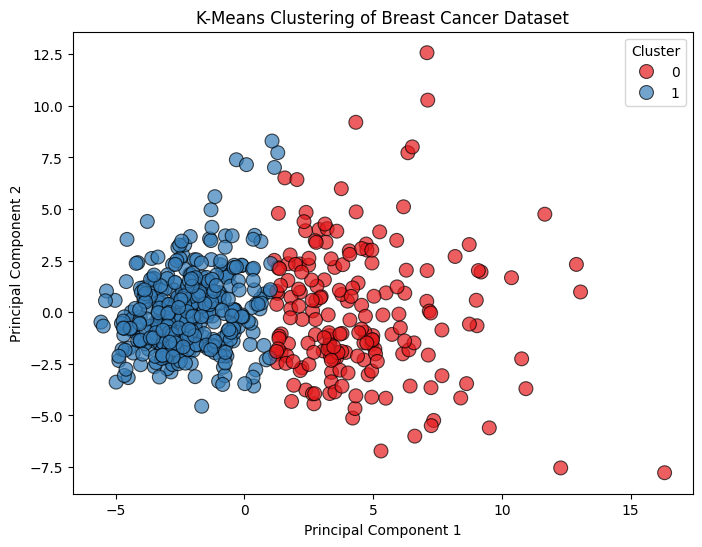

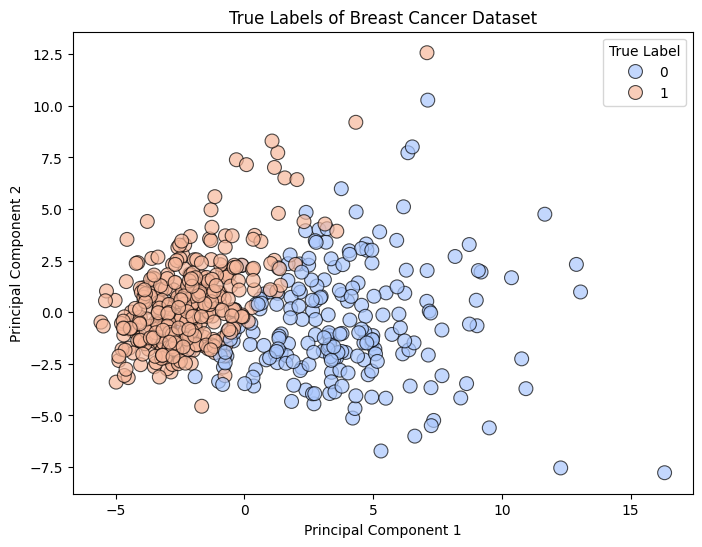

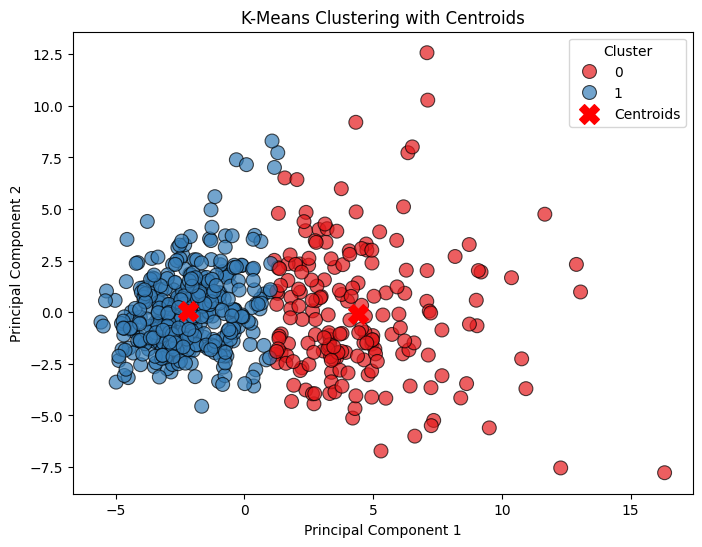

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y, y_kmeans))
print("\nClassification Report:")
print(classification_report(y, y_kmeans))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = y_kmeans
df['True Label'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, edgecolor='black', alpha=0.7)
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='True Label', palette='coolwarm', s=100, edgecolor='black', alpha=0.7)
plt.title('True Labels of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="True Label")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, edgecolor='black', alpha=0.7)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()

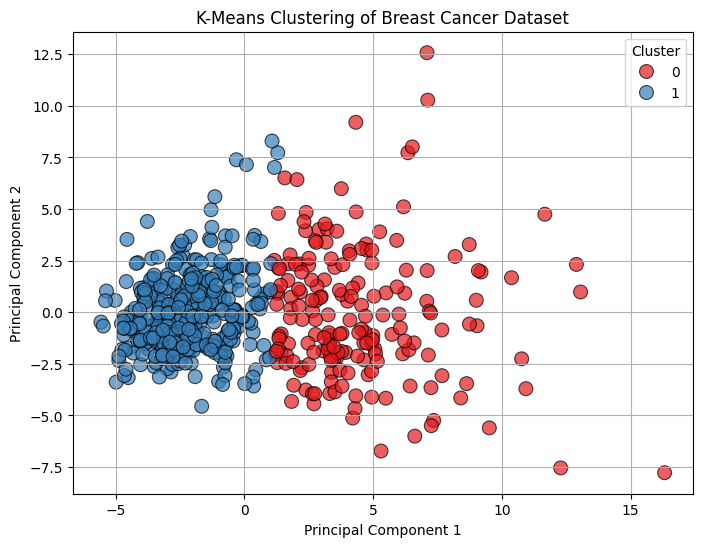

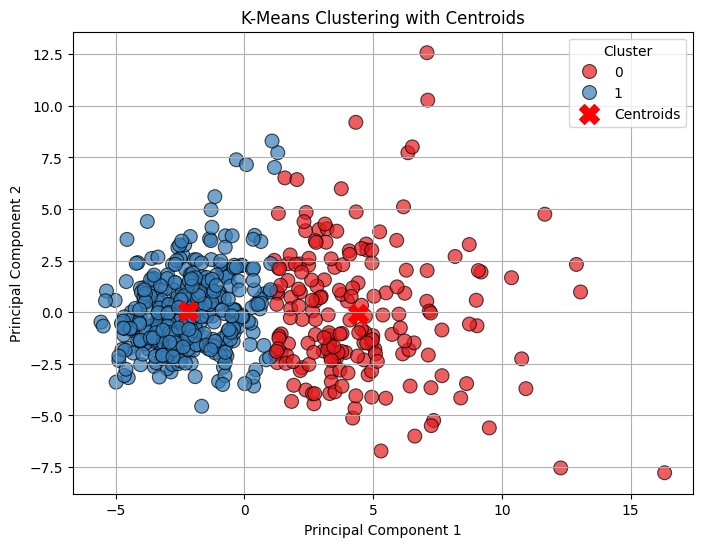

In [ ]:
# Lab Program 10 : Develop a program to implement k-means clustering using Wisconsin Breast Cancer data set and visualize the clustering result.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = y_kmeans
df['True Label'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, edgecolor='black', alpha=0.7)
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, edgecolor='black', alpha=0.7)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
